In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1 dim cross-correlation
$$C_k = \sum_n a_{k+n}v_{n}$$

```
np.correlate(a, v, mode='valid')
```


In [138]:
np.correlate([1, 2, 3], [0, 1, 0.5], "full")

array([0.5, 2. , 3.5, 3. , 0. ])

```
           1 ,  2 ,  3 
  0, 1, 0.5                                        1 * 0.5                       = 0.5
      0,  1,  0.5                                  1 * 1 + 2 * 0.5            = 2
           0,   1,    0.5                          1 * 0 + 2 * 1 + 3 * 0.5 = 3.5
                 0,    1,  0.5                     2 * 0 + 3 * 1               = 3
                        0,    1,   05              3 * 0                          = 0
```

ref: https://qiita.com/inoory/items/3ea2d447f6f1e8c40ffa

In [8]:
signal_size = 100
sig1_obs_range = 500
sig2_obs_range = 400


target_sig = np.random.normal(size=signal_size) * 1.0
delay = 250 #unknown

sig1 = np.random.normal(size=sig1_obs_range) * 0.2
sig1[delay:  delay + signal_size] += target_sig

sig2 = np.random.normal(size=sig2_obs_range) * 0.2
sig2[: signal_size] += target_sig

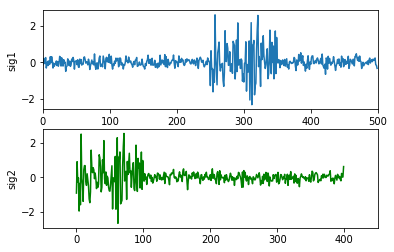

In [9]:
plt.subplot(2, 1, 1)
plt.ylabel("sig1")
plt.xlim([0,500])
plt.plot(sig1)

plt.subplot(2, 1, 2)
plt.ylabel("sig2")
plt.plot(sig2, color="g")
plt.xlim([-50,450])
plt.show()

In [10]:
corr = np.correlate(sig1, sig2, "full")

In [11]:
estimated_delay = corr[sig2_obs_range:].argmax() +1
estimated_delay

250

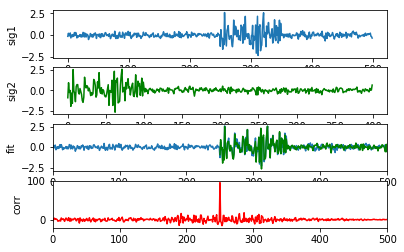

In [15]:
plt.subplot(4, 1, 1)
plt.ylabel("sig1")
plt.plot(sig1)

plt.subplot(4, 1, 2)
plt.ylabel("sig2")
plt.plot(sig2, color="g")

plt.subplot(4, 1, 3)
plt.ylabel("fit")
plt.plot(np.arange(len(sig1)), sig1)
plt.plot(np.arange(len(sig2)) + estimated_delay, sig2, color="g" )
plt.xlim([0, len(sig1)])

plt.subplot(4, 1, 4)
plt.ylabel("corr")
plt.plot(np.arange(len(corr)) - len(sig2) + 1, corr, color="r")
plt.xlim([0, len(sig1)])

plt.show()

ref: https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.signal.correlate.html

/Users/tdual/anaconda2/envs/py3.6/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


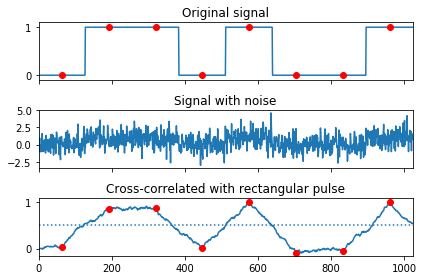

In [16]:
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))
corr = np.correlate(sig_noise, np.ones(128), mode='same') / 128


clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)

ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')

ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')

ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')

ax_orig.margins(0, 0.1)
fig.tight_layout()
fig.show()